<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---



## Visualise the PAP-SMEAR data using PCA

Visualise the data using Principal Component Analysis. Features in the CSV file have been precomputed. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import io, measure, exposure
from skimage.color import rgba2rgb, rgb2gray
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import os
import csv
import random

%matplotlib inline

### Step 1: Load the csv files that contain the generated features 

In [2]:
features = []

with open('../images/papsmear-features-normal.csv', newline='') as csvfile:
    stored_features = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in stored_features:
        filename = row[0]
        class_label = row[1]
        v = np.array(row[2:len(row)], dtype=np.float32)
        f = [filename, class_label, v]
        features.append(f)


In [3]:
with open('../images/papsmear-features-displastic.csv', newline='') as csvfile:
    stored_features = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in stored_features:
        filename = row[0]
        class_label = row[1]
        v = np.array(row[2:len(row)], dtype=np.float32)
        f = [filename, class_label, v]
        features.append(f)

### Step 1: Split data into test and training data

In [4]:
feature_length = len(features[0][2])
print(feature_length)

22


In [5]:
random.shuffle(features)

In [6]:
features_train = features[0:280]
features_test = features[280:len(features)]

In [7]:
data_train = np.zeros((len(features_train), feature_length))
colours_train = np.zeros(len(features_train))

In [8]:
for i in range(0, len(features_train)):
    data_train[i, :] = features_train[i][2]
    if (features_train[i][1] == '0'):
        colours_train[i] = 0.25
    else:
        colours_train[i] = 0.75

In [9]:
pca = PCA(n_components=2)

In [10]:
train_pca = pca.fit_transform(data_train)

In [11]:
train_projected = pca.transform(data_train)

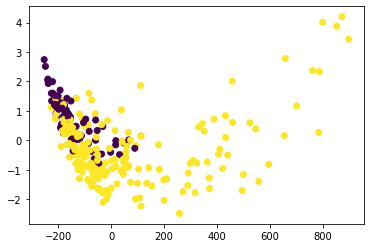

In [12]:
plt.scatter(train_projected[:,0], train_projected[:, 1], c=colours_train, marker='o');